In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
creadit_data = pd.read_csv('../Hyperparameter Tuning/Dataset/credit-card-full.csv')

In [3]:
creadit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
creadit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
creadit_data.var()

ID                            7.500250e+07
LIMIT_BAL                     1.683446e+10
SEX                           2.392474e-01
EDUCATION                     6.246510e-01
MARRIAGE                      2.724523e-01
AGE                           8.496976e+01
PAY_0                         1.262930e+00
PAY_2                         1.433254e+00
PAY_3                         1.432492e+00
PAY_4                         1.366885e+00
PAY_5                         1.284114e+00
PAY_6                         1.322472e+00
BILL_AMT1                     5.422240e+09
BILL_AMT2                     5.065705e+09
BILL_AMT3                     4.809338e+09
BILL_AMT4                     4.138716e+09
BILL_AMT5                     3.696294e+09
BILL_AMT6                     3.546692e+09
PAY_AMT1                      2.743423e+08
PAY_AMT2                      5.308817e+08
PAY_AMT3                      3.100051e+08
PAY_AMT4                      2.454286e+08
PAY_AMT5                      2.334266e+08
PAY_AMT6   

In [6]:
creadit_data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [7]:
creadit_data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
creadit_data.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [10]:
X = creadit_data.drop('default payment next month', axis=1)

In [11]:
y = creadit_data['default payment next month']

In [12]:
X_test, X_train, y_test, y_train = train_test_split(X, y, stratify=y, random_state=42)

In [13]:
log_reg = LogisticRegression( random_state=42, n_jobs=-1, max_iter=1000)

In [14]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42)

In [15]:
log_reg.coef_

array([[-1.34739057e-05, -2.37268536e-06, -8.46693377e-04,
        -9.45875248e-04, -1.00801714e-03, -1.28806427e-02,
         2.35953873e-03,  1.79128063e-03,  1.55534341e-03,
         1.47026875e-03,  1.44354125e-03,  1.24249599e-03,
        -1.46169277e-05,  1.37949519e-05,  1.57223638e-06,
         7.29022824e-07,  1.60330434e-06,  2.43982395e-06,
        -4.53096894e-05, -1.48479135e-05, -1.67045553e-05,
        -1.05439001e-05, -1.12307604e-05, -1.88470330e-06]])

In [16]:
original_variables = list(X_train.columns)
original_variables

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [17]:
zipped_together = list(zip(original_variables, log_reg.coef_[0]))
zipped_together

[('ID', -1.3473905733348525e-05),
 ('LIMIT_BAL', -2.3726853556643467e-06),
 ('SEX', -0.0008466933770267159),
 ('EDUCATION', -0.0009458752476165015),
 ('MARRIAGE', -0.001008017141649902),
 ('AGE', -0.012880642738338645),
 ('PAY_0', 0.0023595387333148117),
 ('PAY_2', 0.0017912806308682371),
 ('PAY_3', 0.0015553434135699353),
 ('PAY_4', 0.0014702687521608517),
 ('PAY_5', 0.0014435412505015854),
 ('PAY_6', 0.0012424959886442116),
 ('BILL_AMT1', -1.4616927744272934e-05),
 ('BILL_AMT2', 1.379495190791849e-05),
 ('BILL_AMT3', 1.5722363819612267e-06),
 ('BILL_AMT4', 7.290228243944976e-07),
 ('BILL_AMT5', 1.6033043397130956e-06),
 ('BILL_AMT6', 2.4398239491209744e-06),
 ('PAY_AMT1', -4.530968935105145e-05),
 ('PAY_AMT2', -1.4847913486441648e-05),
 ('PAY_AMT3', -1.670455528040402e-05),
 ('PAY_AMT4', -1.0543900133158017e-05),
 ('PAY_AMT5', -1.1230760390813768e-05),
 ('PAY_AMT6', -1.8847033002076866e-06)]

In [18]:
coefs = [list(x) for x in zipped_together]
coefs

[['ID', -1.3473905733348525e-05],
 ['LIMIT_BAL', -2.3726853556643467e-06],
 ['SEX', -0.0008466933770267159],
 ['EDUCATION', -0.0009458752476165015],
 ['MARRIAGE', -0.001008017141649902],
 ['AGE', -0.012880642738338645],
 ['PAY_0', 0.0023595387333148117],
 ['PAY_2', 0.0017912806308682371],
 ['PAY_3', 0.0015553434135699353],
 ['PAY_4', 0.0014702687521608517],
 ['PAY_5', 0.0014435412505015854],
 ['PAY_6', 0.0012424959886442116],
 ['BILL_AMT1', -1.4616927744272934e-05],
 ['BILL_AMT2', 1.379495190791849e-05],
 ['BILL_AMT3', 1.5722363819612267e-06],
 ['BILL_AMT4', 7.290228243944976e-07],
 ['BILL_AMT5', 1.6033043397130956e-06],
 ['BILL_AMT6', 2.4398239491209744e-06],
 ['PAY_AMT1', -4.530968935105145e-05],
 ['PAY_AMT2', -1.4847913486441648e-05],
 ['PAY_AMT3', -1.670455528040402e-05],
 ['PAY_AMT4', -1.0543900133158017e-05],
 ['PAY_AMT5', -1.1230760390813768e-05],
 ['PAY_AMT6', -1.8847033002076866e-06]]

In [19]:
coefs = pd.DataFrame(coefs, columns=['Variables', 'Coefeciencient'])
coefs

,Variables,Coefeciencient
0,ID,-1.347391e-05
1,LIMIT_BAL,-2.372685e-06
2,SEX,-8.466934e-04
3,EDUCATION,-9.458752e-04
4,MARRIAGE,-1.008017e-03
5,AGE,-1.288064e-02
6,PAY_0,2.359539e-03
7,PAY_2,1.791281e-03
8,PAY_3,1.555343e-03
9,PAY_4,1.470269e-03


In [20]:
coefs.sort_values(by='Coefeciencient', ascending=False, inplace=True, axis=0)
coefs.head()

,Variables,Coefeciencient
6,PAY_0,0.002360
7,PAY_2,0.001791
8,PAY_3,0.001555
9,PAY_4,0.001470
10,PAY_5,0.001444


In [21]:
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf_clf = RandomForestClassifier(max_depth=2)


In [23]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2)

In [24]:
chosen_tree = rf_clf.estimators_[7]

In [25]:
chosen_tree

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1752962031)

In [26]:
split_column = chosen_tree.tree_.feature[1]
split_column

19

In [27]:
split_column_name = X_train.columns[split_column]
split_column_name

'PAY_AMT2'

In [28]:
split_value = chosen_tree.tree_.threshold[1]
split_value

2000.5

In [29]:
print(f'Split on {split_column_name} <= {split_value}')

Split on PAY_AMT2 <= 2000.5


Lecture 2

In [30]:
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [31]:
rf_clf = RandomForestClassifier(n_estimators=100, criterion='entropy')

In [32]:
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [33]:
log_reg_clf = LogisticRegression()

In [34]:
log_reg_clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn_clf = KNeighborsClassifier()

In [37]:
knn_clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [38]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [45]:
# Import GBM classifier
from sklearn.ensemble import GradientBoostingClassifier


In [46]:
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]
results_list = []


In [47]:
for learning_rate in learning_rates:
    gb_clf = GradientBoostingClassifier(learning_rate=learning_rate)
    gb_clf.fit(X_train, y_train)
    y_pred = gb_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results_list.append([learning_rate, accuracy])
results_df = pd.DataFrame(results_list, columns=['learning_rate', 'accuracy'])

In [48]:
results_list

[[0.001, 0.7788],
 [0.01, 0.8089333333333333],
 [0.05, 0.8201777777777778],
 [0.1, 0.8185777777777777],
 [0.2, 0.8177333333333333],
 [0.5, 0.8033333333333333]]

In [49]:
learn_rates = np.linspace(0.01, 2, 30)
accuracies = []

In [50]:
for learn_rate in learn_rates:
    gb_clf = GradientBoostingClassifier(learning_rate=learn_rate)
    gb_clf.fit(X_train, y_train)
    y_pred = gb_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

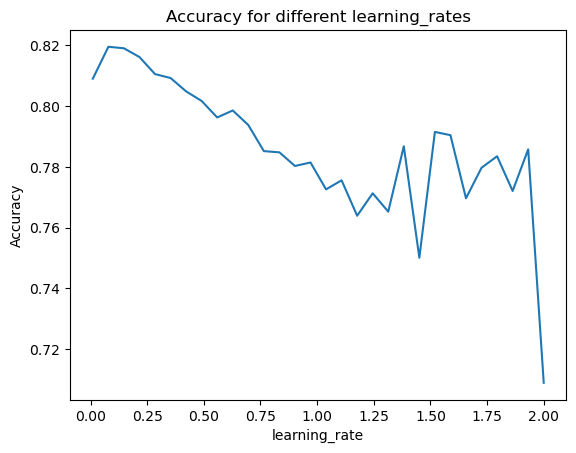

In [51]:
plt.plot(learn_rates, accuracies)
plt.gca().set(xlabel='learning_rate', ylabel='Accuracy', title='Accuracy for different learning_rates')
plt.show()

In [52]:
gb_clf = GradientBoostingClassifier()

In [53]:
gb_clf.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Manual Grid Search

In [54]:
from sklearn.model_selection import GridSearchCV

In [57]:
learn_rate = [0.001, 0.01,0.05]
max_depth = [4, 6, 8,10]

In [59]:
def gbm_grid_search(learn_rate, max_depth):
    gb_clf = GradientBoostingClassifier(learning_rate=learn_rate, max_depth=max_depth)
    predictions = gb_clf.fit(X_train, y_train).predict(X_test)
    return([learn_rate, max_depth, accuracy_score(y_test, predictions)])


In [61]:
results_list = []

for rate in learn_rate:
    for depth in max_depth:
        results_list.append(gbm_grid_search(rate, depth))


In [62]:
print(pd.DataFrame(results_list, columns=['learn_rate', 'max_depth', 'accuracy']))

    learn_rate  max_depth  accuracy
0        0.001          4  0.778800
1        0.001          6  0.778800
2        0.001          8  0.778800
3        0.001         10  0.778800
4        0.010          4  0.808267
5        0.010          6  0.809289
6        0.010          8  0.806622
7        0.010         10  0.806533
8        0.050          4  0.820133
9        0.050          6  0.816267
10       0.050          8  0.813467
11       0.050         10  0.809467


Grid Search with Scikit Learn

Steps in a Grid Search:

1. An algorithm to tune the hyperparameters. (Sometimes called an 'estimator')

2. Defining which hyperparameters we will tune
3. Defining a range of values for each hyperparameter

4. Setting a cross-validation scheme; and

5. Define a score function so we can decide which square on our grid was 'the best'.
6. Include extra useful information or functions



The important inputs are:

- estimator
- param_grid
- CV
- scoring
- refit
- n_jobs
- return_train_score


The estimator input:

. Essentially our algorithm
. You have already worked with KNN, Random Forest, GBM, Logistic Regression

Remember:

. Only one estimator per GridSearchCV object

The param_grid input:

- Setting which hyperparameters and values to test

Rather than a list:

max_depth_list = [2, 4, 6, 8]
min_samples_leaf_list = [1, 2, 4, 6]

This would be:

param_grid = {'max_depth': [2, 4, 6, 8],
'min_samples_leaf': [1, 2, 4, 6]}

In [67]:
param_grid = {
    'max_depth': [4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

In [76]:
rf_classifier = RandomForestClassifier(criterion='entropy', max_features=4)

In [77]:
grid_rf_class = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=10, scoring='accuracy', refit=True, return_train_score=True)

In [78]:
grid_rf_class.get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'entropy',
 'estimator__max_depth': None,
 'estimator__max_features': 4,
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(criterion='entropy', max_features=4),
 'n_jobs': None,
 'param_grid': {'max_depth': [4, 6, 8, 10],
  'min_samples_leaf': [1, 2, 4, 6, 8]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': True,
 'scoring': 'accuracy',
 'verbose': 0}

In [79]:
grid_rf_class.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(criterion='entropy',
                                              max_features=4),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 4, 6, 8]},
             return_train_score=True, scoring='accuracy')

In [80]:
grid_rf_class.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [85]:
print(pd.DataFrame(confusion_matrix(y_test, y_pred, normalize='all'), columns=['Predicted No', 'Predicted Yes'], index=['Actual No', 'Actual Yes']))

            Predicted No  Predicted Yes
Actual No       0.744756       0.034044
Actual Yes      0.146756       0.074444


Analyzing Grid Search Output

## Let's analyze the GridSearchCV outputs.

- Three different groups for the GridSearchCV properties:
    - A results log: `cv_results_`
    - The best results: `best_index_`, `best_params_`, and `best_score_`
    - 'Extra information': `scorer_`, `n_splits_`, and `refit_time_`


In [99]:
cv_results_df = pd.DataFrame(grid_rf_class.cv_results_)

In [103]:
print(cv_results_df[['mean_test_score', 'params', 'rank_test_score' ]])

    mean_test_score                                    params  rank_test_score
0   0.809200         {'max_depth': 4, 'min_samples_leaf': 1}   19             
1   0.809867         {'max_depth': 4, 'min_samples_leaf': 2}   18             
2   0.810800         {'max_depth': 4, 'min_samples_leaf': 4}   16             
3   0.810400         {'max_depth': 4, 'min_samples_leaf': 6}   17             
4   0.808933         {'max_depth': 4, 'min_samples_leaf': 8}   20             
5   0.812000         {'max_depth': 6, 'min_samples_leaf': 1}   13             
6   0.813467         {'max_depth': 6, 'min_samples_leaf': 2}   10             
7   0.812667         {'max_depth': 6, 'min_samples_leaf': 4}   12             
8   0.811200         {'max_depth': 6, 'min_samples_leaf': 6}   15             
9   0.811867         {'max_depth': 6, 'min_samples_leaf': 8}   14             
10  0.814400         {'max_depth': 8, 'min_samples_leaf': 1}   6              
11  0.813200         {'max_depth': 8, 'min_samples_l

In [105]:
best_row = cv_results_df[cv_results_df['rank_test_score'] == 1]
best_row

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
16,3.042361,0.463582,0.020324,0.007501,10,2,"{'max_depth': 10, 'min_samples_leaf': 2}",0.832,0.802667,0.817333,...,0.873778,0.876296,0.879111,0.872444,0.876148,0.876,0.874074,0.874519,0.875259,0.001837


Information on the best grid square is neatly summarized in the following three properties:

- `best_params_`: the dictionary of parameters that gave the best score.
- `best_score_`: the actual best score.
- `best_index_`: the row in our `cv_results_` that was the best.


In [113]:
print(grid_rf_class.best_params_, grid_rf_class.best_score_, grid_rf_class.best_index_)

{'max_depth': 10, 'min_samples_leaf': 2} 0.8161333333333334 16


- The best_estimator_ property is an estimator built using the best parameters from the grid search.
- For us this is a Random Forest estimator:
    - type(grid_rf_class.best_estimator_)
    - sklearn.ensemble.forest.RandomForestClassifier


In [116]:
grid_rf_class.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 4,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Extra information:

- scorer_: What scorer function was used on the held out data. (we set it to AUC)
- n_splits_: How many cross-validation splits. (We set to 10)
- refit_time: The number of seconds used for refitting the best model on the whole dataset.


In [121]:
grid_rf_class.scorer_
grid_rf_class.n_splits_
grid_rf_class.refit_time_

2.7548136711120605

In [125]:
grid_rf_class.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=4,
                       min_samples_leaf=2)

In [126]:
predictions = grid_rf_class.best_estimator_.predict(X_test)

In [127]:
print(pd.DataFrame(confusion_matrix(y_test, predictions, normalize='all'), columns=['Predicted No', 'Predicted Yes'], index=['Actual No', 'Actual Yes']))

            Predicted No  Predicted Yes
Actual No   0.744756      0.034044     
Actual Yes  0.146756      0.074444     
